<a href="https://colab.research.google.com/github/aryanasadianuoit/textreviewclassification/blob/master/binary_review_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from __future__ import division, absolute_import, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  !pip install -q tf-nightly
except Exception:
  pass
import tensorflow as tf

     |████████████████████████████████| 511.7MB 32kB/s 
     |████████████████████████████████| 2.9MB 44.3MB/s 
     |████████████████████████████████| 460kB 10.9MB/s 
     |████████████████████████████████| 2.8MB 41.6MB/s 
     |████████████████████████████████| 778kB 55.6MB/s 
ERROR: tensorflow 1.15.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.


In [9]:
from tensorflow import keras
import tensorflow_datasets as tfds

import numpy as np
print(tf.__version__)

2.2.0-dev20200218


In [10]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k',split=(tfds.Split.TRAIN, tfds.Split.TEST),as_supervised= True, with_info= True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZB9XWM/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZB9XWM/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZB9XWM/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
encoder = info.features['text'].encoder

In [12]:
print('Vocab Size : ',encoder.vocab_size)

Vocab Size :  8185


In [15]:
# Testint the functionality of th encoder in encoding
test_string = "Hello Guys! This is the test case for encoding!"
encoded_test_string = encoder.encode(test_string)
print("Encoded Version : ", encoded_test_string)
print("***************************************")
decoded_test_string = encoder.decode(encoded_test_string)
print("Decoded Version : ", decoded_test_string)

Encoded Version :  [4025, 222, 6347, 8044, 90, 62, 9, 1, 6282, 811, 23, 6213, 2587, 7962]
***************************************
Decoded Version :  Hello Guys! This is the test case for encoding!


In [22]:
for i in range(0, len(encoded_test_string)):
  print(encoded_test_string[i],"   ", encoder.decode([encoded_test_string[i]]))

4025     Hell
222     o 
6347     Guy
8044     s
90     ! 
62     This 
9     is 
1     the 
6282     test 
811     case 
23     for 
6213     enco
2587     ding
7962     !


In [31]:
for train_example, train_label  in train_data.take(1):
  print("Encoded Version : ", train_example.numpy())
  print("Label : ",train_label.numpy())
  print("Decoded Version : ", encoder.decode(train_example)) 

Encoded Version :  [  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975]
Label :  0
Decoded Version :  This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, 

In [0]:
BUFFER_SIZE =1000
train_batches = ( train_data.shuffle(BUFFER_SIZE).padded_batch(32))
test_batches = (test_data.padded_batch(32))

In [35]:
for example_batch , label_batch in train_batches.take(2):
  print("Btach Shape: ",example_batch.shape)
  print("Label Shape :", label_batch.shape)

Btach Shape:  (32, 696)
Label Shape : (32,)
Btach Shape:  (32, 1615)
Label Shape : (32,)


In [0]:
# Let's Build the model 

model = keras.Sequential([keras.layers.Embedding(encoder.vocab_size,16), keras.layers.GlobalAveragePooling1D(),keras.layers.Dense(1)])



In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [0]:
#loss Function
model.compile(optimizer="adam", loss= tf.losses.BinaryCrossentropy(from_logits= True),metrics=['accuracy'])

In [40]:
# Training the model
history = model.fit(train_batches, epochs= 10, validation_data= test_batches, validation_steps= 30)

Epoch 1/10
782/782 [==============================] - 13s 17ms/step - loss: 0.6817 - accuracy: 0.5008 - val_loss: 0.6647 - val_accuracy: 0.5063
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 0.6202 - accuracy: 0.5540 - val_loss: 0.5946 - val_accuracy: 0.5813
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.5423 - accuracy: 0.6610 - val_loss: 0.5326 - val_accuracy: 0.7302
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.4765 - accuracy: 0.7524 - val_loss: 0.4825 - val_accuracy: 0.7625
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.4230 - accuracy: 0.8013 - val_loss: 0.4449 - val_accuracy: 0.8094
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.3819 - accuracy: 0.8329 - val_loss: 0.4173 - val_accuracy: 0.8396
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 0.3504 - accuracy: 0.8533 - val_loss: 0.3969 - val_accuracy:

In [41]:
loss , accuracy =  model.evaluate(test_batches)
print("Loss : ",loss, "*"*10, "  Accuracy : ",accuracy)

    782/Unknown - 7s 9ms/step - loss: 0.3342 - accuracy: 0.8436Loss :  0.3341902961473331 **********   Accuracy :  0.84364


In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

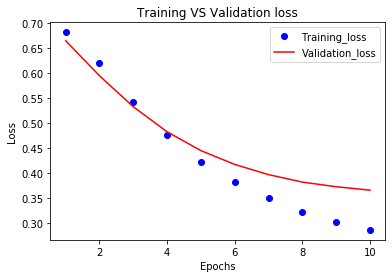

In [53]:
import matplotlib.pyplot as plt

acc = history_dict["accuracy"]
loss = history_dict["loss"]
val_acc = history_dict["val_accuracy"]
val_loss = history_dict["val_loss"]
epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label = "Training_loss")
plt.plot(epochs,val_loss,'r',label = "Validation_loss")
plt.title("Training VS Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc= "upper right")
plt.show()

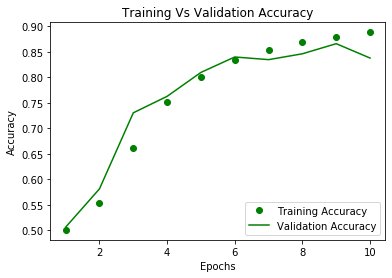

In [55]:
plt.plot(epochs,acc,'go',label= "Training Accuracy")
plt.plot(epochs,val_acc,'g',label= "Validation Accuracy")
plt.title("Training Vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc= "lower right")
plt.show()